# Importing Libraries and Dataset

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
dataset = pd.read_csv("./CSV/train_dataset_new.csv")

# Step 1: Data Understanding, Cleaning and Pre-processing

In [3]:
dataset.head()

,url,label
0,irs-profilepaymentservice.com/home,1
1,cpuggsukabumi.id,0
2,members.tripod.com/~don_rc/ring.htm,0
3,optuswebmailadminprovider.weebly.com/,1
4,topoz.com.pl,0


In [10]:
#dataset.drop(dataset.iloc[:, 2:60], inplace=True, axis=1)
#dataset.head()

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   url     1048575 non-null  object
 1   label   1048575 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 16.0+ MB


In [5]:
print("Dataset shape:", dataset.shape)

Dataset shape: (1048575, 2)


In [6]:
dataset.keys()

Index(['url', 'label'], dtype='object')

In [14]:
dataset['label'].value_counts()

label
0    823250
1    225325
Name: count, dtype: int64

In [15]:
dataset['url'].value_counts()

url
irs-profilepaymentservice.com/home                                               1
diskomir.ru                                                                      1
tribe.net/                                                                       1
reoxmletza.duckdns.org                                                           1
secure03achasecom.salesfocres.com/loty2mze=/signin?0346402bb06f7df=              1
                                                                                ..
randomss12.s3.au-syd.cloud-object-storage.appdomain.cloud/mastered/index.html    1
helpappeal.org.uk                                                                1
bo9bie3gs4roff3g.abqwinr2.shop/                                                  1
bankingshortcuts.com                                                             1
therops.com/                                                                     1
Name: count, Length: 1048575, dtype: int64

In [16]:
n_samples, n_features = dataset.shape
print('Number of samples:', n_samples)
print('Number of features:', n_features)

Number of samples: 1048575
Number of features: 2


In [17]:
dataset.isnull().sum()

url      0
label    0
dtype: int64

In [18]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
dataset["class_url"] = lb_make.fit_transform(dataset["label"])
print(dataset["class_url"].value_counts())
print(dataset["label"].value_counts())

class_url
0    823250
1    225325
Name: count, dtype: int64
label
0    823250
1    225325
Name: count, dtype: int64


In [19]:
print(dataset)

                                           url  label  class_url
0           irs-profilepaymentservice.com/home      1          1
1                             cpuggsukabumi.id      0          0
2          members.tripod.com/~don_rc/ring.htm      0          0
3        optuswebmailadminprovider.weebly.com/      1          1
4                                 topoz.com.pl      0          0
...                                        ...    ...        ...
1048570                     marymarthamama.com      0          0
1048571                              shape.com      0          0
1048572                vietnamconsulate-sf.org      0          0
1048573                                 tis.az      0          0
1048574                           therops.com/      0          0

[1048575 rows x 3 columns]


# Step 2: Feature Engineering

In [7]:
dataset['url'] = dataset['url'].replace('www.', '', regex=True)
print(dataset)

                                           url  label
0           irs-profilepaymentservice.com/home      1
1                             cpuggsukabumi.id      0
2          members.tripod.com/~don_rc/ring.htm      0
3        optuswebmailadminprovider.weebly.com/      1
4                                 topoz.com.pl      0
...                                        ...    ...
1048570                     marymarthamama.com      0
1048571                              shape.com      0
1048572                vietnamconsulate-sf.org      0
1048573                                 tis.az      0
1048574                           therops.com/      0

[1048575 rows x 2 columns]


In [8]:
dataset['url_len'] = dataset['url'].apply(lambda x: len(str(x)))

dataset

,url,label,url_len
0,irs-profilepaymentservice.com/home,1,34
1,cpuggsukabumi.id,0,16
2,members.tripod.com/~don_rc/ring.htm,0,35
3,optuswebmailadminprovider.weebly.com/,1,37
4,topoz.com.pl,0,12
...,...,...,...
1048570,marymarthamama.com,0,18
1048571,shape.com,0,9
1048572,vietnamconsulate-sf.org,0,23
1048573,tis.az,0,6


In [9]:
from tld import get_tld

def process_tld(url):
    """
    Extracts the top-level domain (TLD) from the given URL.

    Parameters:
    url (str): The URL from which to extract the top-level domain.

    Returns:
    str or None: The extracted top-level domain if successful, None otherwise.
    """
    try:
        res = get_tld(url, as_object=True, fail_silently=False, fix_protocol=True)
        domain = res.parsed_url.netloc
    except:
        domain = None
    return domain

dataset['domain'] = dataset['url'].apply(lambda i: process_tld(i))

dataset


,url,label,url_len,domain
0,irs-profilepaymentservice.com/home,1,34,irs-profilepaymentservice.com
1,cpuggsukabumi.id,0,16,cpuggsukabumi.id
2,members.tripod.com/~don_rc/ring.htm,0,35,members.tripod.com
3,optuswebmailadminprovider.weebly.com/,1,37,optuswebmailadminprovider.weebly.com
4,topoz.com.pl,0,12,topoz.com.pl
...,...,...,...,...
1048570,marymarthamama.com,0,18,marymarthamama.com
1048571,shape.com,0,9,shape.com
1048572,vietnamconsulate-sf.org,0,23,vietnamconsulate-sf.org
1048573,tis.az,0,6,tis.az


In [10]:
from urllib.parse import urlparse
import re

def abnormal_url(url):
    """
    Checks if the given URL contains the hostname within it.

    Parameters:
    url (str): The URL to be checked.

    Returns:
    int: Returns 1 if the hostname is found within the URL, 0 otherwise.
    """
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    
    match = re.search(hostname, url)
    
    if match:
        return 1
    else:
        return 0
dataset['abnormal_url'] = dataset['url'].apply(lambda i: abnormal_url(i))
dataset


,url,label,url_len,domain,abnormal_url
0,irs-profilepaymentservice.com/home,1,34,irs-profilepaymentservice.com,0
1,cpuggsukabumi.id,0,16,cpuggsukabumi.id,0
2,members.tripod.com/~don_rc/ring.htm,0,35,members.tripod.com,0
3,optuswebmailadminprovider.weebly.com/,1,37,optuswebmailadminprovider.weebly.com,0
4,topoz.com.pl,0,12,topoz.com.pl,0
...,...,...,...,...,...
1048570,marymarthamama.com,0,18,marymarthamama.com,0
1048571,shape.com,0,9,shape.com,0
1048572,vietnamconsulate-sf.org,0,23,vietnamconsulate-sf.org,0
1048573,tis.az,0,6,tis.az,0


In [11]:
import re

def having_ip_address(url: str) -> int:
    """
    Checks if the given URL contains an IP address in its domain.

    Parameters:
    url (str): The URL to be checked.

    Returns:
    int: Returns 1 if an IP address is found in the URL, 0 otherwise.
    """
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        return 1
    else:
        return 0

# Apply the having_ip_address function to each URL in the 'url' column of the dataset
dataset['use_of_ip_address'] = dataset['url'].apply(lambda i: having_ip_address(i))
dataset


,url,label,url_len,domain,abnormal_url,use_of_ip_address
0,irs-profilepaymentservice.com/home,1,34,irs-profilepaymentservice.com,0,0
1,cpuggsukabumi.id,0,16,cpuggsukabumi.id,0,0
2,members.tripod.com/~don_rc/ring.htm,0,35,members.tripod.com,0,0
3,optuswebmailadminprovider.weebly.com/,1,37,optuswebmailadminprovider.weebly.com,0,0
4,topoz.com.pl,0,12,topoz.com.pl,0,0
...,...,...,...,...,...,...
1048570,marymarthamama.com,0,18,marymarthamama.com,0,0
1048571,shape.com,0,9,shape.com,0,0
1048572,vietnamconsulate-sf.org,0,23,vietnamconsulate-sf.org,0,0
1048573,tis.az,0,6,tis.az,0,0


In [12]:
dataset['use_of_ip_address'].value_counts()


use_of_ip_address
0    1044781
1       3794
Name: count, dtype: int64

In [13]:
features = ['@','?','-','=','.','#','%','+','$','!','*',',','//']

for a in features:
    dataset[a] = dataset['url'].apply(lambda i: i.count(a))
dataset

,url,label,url_len,domain,abnormal_url,use_of_ip_address,@,?,-,=,.,#,%,+,$,!,*,",",//
0,irs-profilepaymentservice.com/home,1,34,irs-profilepaymentservice.com,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
1,cpuggsukabumi.id,0,16,cpuggsukabumi.id,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,members.tripod.com/~don_rc/ring.htm,0,35,members.tripod.com,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0
3,optuswebmailadminprovider.weebly.com/,1,37,optuswebmailadminprovider.weebly.com,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0
4,topoz.com.pl,0,12,topoz.com.pl,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,marymarthamama.com,0,18,marymarthamama.com,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1048571,shape.com,0,9,shape.com,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1048572,vietnamconsulate-sf.org,0,23,vietnamconsulate-sf.org,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
1048573,tis.az,0,6,tis.az,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [14]:
def sum_count_special_characters(url: str) -> int:
    """
    Counts the occurrence of special characters in the given URL.

    Parameters:
    url (str): The URL to be analyzed.

    Returns:
    int: The total count of special characters found in the URL.
    """
    special_chars = ['@','?','-','=','.','#','%','+','$','!','*',',','//']

    num_special_chars = sum(char in special_chars for char in url)
    return num_special_chars

# Apply the sum_count_special_characters function to each URL in the 'url' column of the dataset
dataset['sum_count_special_chars'] = dataset['url'].apply(lambda x: sum_count_special_characters(x))
dataset



,url,label,url_len,domain,abnormal_url,use_of_ip_address,@,?,-,=,.,#,%,+,$,!,*,",",//,sum_count_special_chars
0,irs-profilepaymentservice.com/home,1,34,irs-profilepaymentservice.com,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,2
1,cpuggsukabumi.id,0,16,cpuggsukabumi.id,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,members.tripod.com/~don_rc/ring.htm,0,35,members.tripod.com,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,3
3,optuswebmailadminprovider.weebly.com/,1,37,optuswebmailadminprovider.weebly.com,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2
4,topoz.com.pl,0,12,topoz.com.pl,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,marymarthamama.com,0,18,marymarthamama.com,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1048571,shape.com,0,9,shape.com,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1048572,vietnamconsulate-sf.org,0,23,vietnamconsulate-sf.org,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,2
1048573,tis.az,0,6,tis.az,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [28]:
dataset.drop(columns=dataset.columns[8:20], inplace=True)
          
dataset

,url,label,class_url,url_len,domain,abnormal_url,use_of_ip_address,@,sum_count_special_chars
0,irs-profilepaymentservice.com/home,1,1,34,irs-profilepaymentservice.com,0,0,0,2
1,cpuggsukabumi.id,0,0,16,cpuggsukabumi.id,0,0,0,1
2,members.tripod.com/~don_rc/ring.htm,0,0,35,members.tripod.com,0,0,0,3
3,optuswebmailadminprovider.weebly.com/,1,1,37,optuswebmailadminprovider.weebly.com,0,0,0,2
4,topoz.com.pl,0,0,12,topoz.com.pl,0,0,0,2
...,...,...,...,...,...,...,...,...,...
1048570,marymarthamama.com,0,0,18,marymarthamama.com,0,0,0,1
1048571,shape.com,0,0,9,shape.com,0,0,0,1
1048572,vietnamconsulate-sf.org,0,0,23,vietnamconsulate-sf.org,0,0,0,2
1048573,tis.az,0,0,6,tis.az,0,0,0,1


In [29]:
dataset.head()

,url,label,class_url,url_len,domain,abnormal_url,use_of_ip_address,@,sum_count_special_chars
0,irs-profilepaymentservice.com/home,1,1,34,irs-profilepaymentservice.com,0,0,0,2
1,cpuggsukabumi.id,0,0,16,cpuggsukabumi.id,0,0,0,1
2,members.tripod.com/~don_rc/ring.htm,0,0,35,members.tripod.com,0,0,0,3
3,optuswebmailadminprovider.weebly.com/,1,1,37,optuswebmailadminprovider.weebly.com,0,0,0,2
4,topoz.com.pl,0,0,12,topoz.com.pl,0,0,0,2


In [15]:
from urllib.parse import urlparse

def httpSecured(url: str) -> int:
    """
    Checks if the given URL uses HTTPS protocol.

    Parameters:
    url (str): The URL to be checked.

    Returns:
    int: Returns 1 if the URL uses HTTPS protocol, 0 otherwise.
    """
    htp = urlparse(url).scheme
    match = str(htp)
    if match == 'https':
        return 1
    else:
        return 0

# Apply the httpSecured function to each URL in the 'url' column of the dataset
dataset['https'] = dataset['url'].apply(lambda x: httpSecured(x))
dataset


,url,label,url_len,domain,abnormal_url,use_of_ip_address,@,?,-,=,...,#,%,+,$,!,*,",",//,sum_count_special_chars,https
0,irs-profilepaymentservice.com/home,1,34,irs-profilepaymentservice.com,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,2,0
1,cpuggsukabumi.id,0,16,cpuggsukabumi.id,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,members.tripod.com/~don_rc/ring.htm,0,35,members.tripod.com,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0
3,optuswebmailadminprovider.weebly.com/,1,37,optuswebmailadminprovider.weebly.com,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
4,topoz.com.pl,0,12,topoz.com.pl,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,marymarthamama.com,0,18,marymarthamama.com,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1048571,shape.com,0,9,shape.com,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1048572,vietnamconsulate-sf.org,0,23,vietnamconsulate-sf.org,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,2,0
1048573,tis.az,0,6,tis.az,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [31]:
def digit_count(url: str) -> int:
    """
    Counts the number of digits in the given URL.

    Parameters:
    url (str): The URL to be analyzed.

    Returns:
    int: The total count of digits found in the URL.
    """
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits

# Apply the digit_count function to each URL in the 'url' column of the dataset
dataset['digits']  = dataset['url'].apply(lambda x: digit_count(x))
dataset


,url,label,url_len,domain,abnormal_url,use_of_ip_address,@,?,-,=,...,$,!,*,",",//,sum_count_special_chars,https,Shortining_Service,google_index,digits
0,irs-profilepaymentservice.com/home,1,34,irs-profilepaymentservice.com,0,0,0,0,1,0,...,0,0,0,0,0,2,0,0,1,0
1,cpuggsukabumi.id,0,16,cpuggsukabumi.id,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,members.tripod.com/~don_rc/ring.htm,0,35,members.tripod.com,0,0,0,0,0,0,...,0,0,0,0,0,3,0,0,1,0
3,optuswebmailadminprovider.weebly.com/,1,37,optuswebmailadminprovider.weebly.com,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,1,0
4,topoz.com.pl,0,12,topoz.com.pl,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,marymarthamama.com,0,18,marymarthamama.com,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1048571,shape.com,0,9,shape.com,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1048572,vietnamconsulate-sf.org,0,23,vietnamconsulate-sf.org,0,0,0,0,1,0,...,0,0,0,0,0,2,0,0,1,0
1048573,tis.az,0,6,tis.az,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [32]:
def letter_count(url: str) -> int:
    """
    Counts the number of letters (alphabetic characters) in the given URL.

    Parameters:
    url (str): The URL to be analyzed.

    Returns:
    int: The total count of letters found in the URL.
    """
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters

# Apply the letter_count function to each URL in the 'url' column of the dataset
dataset['letters'] = dataset['url'].apply(lambda x: letter_count(x))
dataset


,url,label,url_len,domain,abnormal_url,use_of_ip_address,@,?,-,=,...,!,*,",",//,sum_count_special_chars,https,Shortining_Service,google_index,digits,letters
0,irs-profilepaymentservice.com/home,1,34,irs-profilepaymentservice.com,0,0,0,0,1,0,...,0,0,0,0,2,0,0,1,0,31
1,cpuggsukabumi.id,0,16,cpuggsukabumi.id,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,15
2,members.tripod.com/~don_rc/ring.htm,0,35,members.tripod.com,0,0,0,0,0,0,...,0,0,0,0,3,0,0,1,0,28
3,optuswebmailadminprovider.weebly.com/,1,37,optuswebmailadminprovider.weebly.com,0,0,0,0,0,0,...,0,0,0,0,2,0,0,1,0,34
4,topoz.com.pl,0,12,topoz.com.pl,0,0,0,0,0,0,...,0,0,0,0,2,0,0,1,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,marymarthamama.com,0,18,marymarthamama.com,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,17
1048571,shape.com,0,9,shape.com,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,8
1048572,vietnamconsulate-sf.org,0,23,vietnamconsulate-sf.org,0,0,0,0,1,0,...,0,0,0,0,2,0,0,1,0,21
1048573,tis.az,0,6,tis.az,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,5


In [16]:
import re

def Shortining_Service(url: str) -> int:
    """
    Checks if the given URL is from a URL shortening service.

    Parameters:
    url (str): The URL to be checked.

    Returns:
    int: Returns 1 if the URL is from a URL shortening service, 0 otherwise.
    """
    match = re.search(
                      'bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0

# Apply the Shortining_Service function to each URL in the 'url' column of the dataset
dataset['Shortining_Service'] = dataset['url'].apply(lambda x: Shortining_Service(x))
dataset


,url,label,url_len,domain,abnormal_url,use_of_ip_address,@,?,-,=,...,%,+,$,!,*,",",//,sum_count_special_chars,https,Shortining_Service
0,irs-profilepaymentservice.com/home,1,34,irs-profilepaymentservice.com,0,0,0,0,1,0,...,0,0,0,0,0,0,0,2,0,0
1,cpuggsukabumi.id,0,16,cpuggsukabumi.id,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,members.tripod.com/~don_rc/ring.htm,0,35,members.tripod.com,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0
3,optuswebmailadminprovider.weebly.com/,1,37,optuswebmailadminprovider.weebly.com,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
4,topoz.com.pl,0,12,topoz.com.pl,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,marymarthamama.com,0,18,marymarthamama.com,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1048571,shape.com,0,9,shape.com,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1048572,vietnamconsulate-sf.org,0,23,vietnamconsulate-sf.org,0,0,0,0,1,0,...,0,0,0,0,0,0,0,2,0,0
1048573,tis.az,0,6,tis.az,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [17]:
from googlesearch import search

def google_index(url: str) -> int:
    """
    Checks if the given URL is indexed by Google.

    Parameters:
    url (str): The URL to be checked.

    Returns:
    int: Returns 1 if the URL is indexed by Google, 0 otherwise.
    """
    site = search(url, 5)
    return 1 if site else 0

# Apply the google_index function to each URL in the 'url' column of the dataset
dataset['google_index'] = dataset['url'].apply(lambda i: google_index(i))
dataset


,url,label,url_len,domain,abnormal_url,use_of_ip_address,@,?,-,=,...,+,$,!,*,",",//,sum_count_special_chars,https,Shortining_Service,google_index
0,irs-profilepaymentservice.com/home,1,34,irs-profilepaymentservice.com,0,0,0,0,1,0,...,0,0,0,0,0,0,2,0,0,1
1,cpuggsukabumi.id,0,16,cpuggsukabumi.id,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,members.tripod.com/~don_rc/ring.htm,0,35,members.tripod.com,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,1
3,optuswebmailadminprovider.weebly.com/,1,37,optuswebmailadminprovider.weebly.com,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,1
4,topoz.com.pl,0,12,topoz.com.pl,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,marymarthamama.com,0,18,marymarthamama.com,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1048571,shape.com,0,9,shape.com,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1048572,vietnamconsulate-sf.org,0,23,vietnamconsulate-sf.org,0,0,0,0,1,0,...,0,0,0,0,0,0,2,0,0,1
1048573,tis.az,0,6,tis.az,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [35]:
dataset.isnull().sum()
dataset

,url,label,class_url,url_len,domain,abnormal_url,use_of_ip_address,@,sum_count_special_chars,https,digits,letters,Shortining_Service,google_index
0,irs-profilepaymentservice.com/home,1,1,34,irs-profilepaymentservice.com,0,0,0,2,0,0,31,0,1
1,cpuggsukabumi.id,0,0,16,cpuggsukabumi.id,0,0,0,1,0,0,15,0,1
2,members.tripod.com/~don_rc/ring.htm,0,0,35,members.tripod.com,0,0,0,3,0,0,28,0,1
3,optuswebmailadminprovider.weebly.com/,1,1,37,optuswebmailadminprovider.weebly.com,0,0,0,2,0,0,34,0,1
4,topoz.com.pl,0,0,12,topoz.com.pl,0,0,0,2,0,0,10,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,marymarthamama.com,0,0,18,marymarthamama.com,0,0,0,1,0,0,17,0,1
1048571,shape.com,0,0,9,shape.com,0,0,0,1,0,0,8,0,1
1048572,vietnamconsulate-sf.org,0,0,23,vietnamconsulate-sf.org,0,0,0,2,0,0,21,0,1
1048573,tis.az,0,0,6,tis.az,0,0,0,1,0,0,5,0,1


In [18]:
dataset = dataset.drop(['class_url','@'],axis=1)#,'type_code'
dataset

KeyError: "['class_url'] not found in axis"

In [19]:
dataset.shape

(1048575, 23)

# Step 3: Exploratory Data Analysis (EDA)


In [38]:
# Set display options to show all columns without truncation
pd.set_option('display.max_columns', None)

# Now print the DataFrame
print(dataset.head())

                                     url  label  url_len  \
0     irs-profilepaymentservice.com/home      1       34   
1                       cpuggsukabumi.id      0       16   
2    members.tripod.com/~don_rc/ring.htm      0       35   
3  optuswebmailadminprovider.weebly.com/      1       37   
4                           topoz.com.pl      0       12   

                                 domain  abnormal_url  use_of_ip_address  \
0         irs-profilepaymentservice.com             0                  0   
1                      cpuggsukabumi.id             0                  0   
2                    members.tripod.com             0                  0   
3  optuswebmailadminprovider.weebly.com             0                  0   
4                          topoz.com.pl             0                  0   

   sum_count_special_chars  https  digits  letters  Shortining_Service  \
0                        2      0       0       31                   0   
1                        1      0 

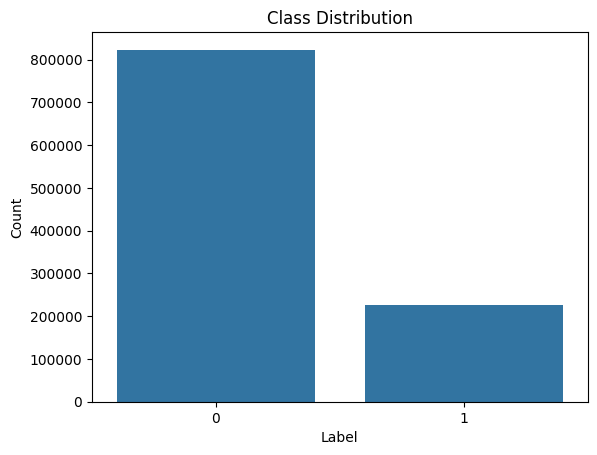

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='label', data=dataset)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()


In [40]:
dataset['domain_length'] = dataset['domain'].apply(lambda x: len(str(x)))
numeric_dataset = dataset.select_dtypes(include=['number'])
correlation_matrix = numeric_dataset.corr()
print(correlation_matrix)

                            label   url_len  abnormal_url  use_of_ip_address  \
label                    1.000000  0.332720      0.004572           0.115185   
url_len                  0.332720  1.000000      0.000781           0.129506   
abnormal_url             0.004572  0.000781      1.000000           0.013136   
use_of_ip_address        0.115185  0.129506      0.013136           1.000000   
sum_count_special_chars  0.296373  0.776744      0.000793           0.113949   
https                    0.001867 -0.000022      0.408247          -0.000059   
digits                   0.256926  0.800519      0.000714           0.122193   
letters                  0.324164  0.965118      0.000337           0.107377   
Shortining_Service       0.046387  0.041108      0.003099          -0.000272   
google_index                  NaN       NaN           NaN                NaN   
domain_length            0.335401  0.276361     -0.004147          -0.102378   

                         sum_count_spec

In [41]:
numeric_dataset

,label,url_len,abnormal_url,use_of_ip_address,sum_count_special_chars,https,digits,letters,Shortining_Service,google_index,domain_length
0,1,34,0,0,2,0,0,31,0,1,29
1,0,16,0,0,1,0,0,15,0,1,16
2,0,35,0,0,3,0,0,28,0,1,18
3,1,37,0,0,2,0,0,34,0,1,36
4,0,12,0,0,2,0,0,10,0,1,12
...,...,...,...,...,...,...,...,...,...,...,...
1048570,0,18,0,0,1,0,0,17,0,1,18
1048571,0,9,0,0,1,0,0,8,0,1,9
1048572,0,23,0,0,2,0,0,21,0,1,23
1048573,0,6,0,0,1,0,0,5,0,1,6


In [42]:
numeric_dataset = numeric_dataset.drop(['google_index'], axis = 1)

In [43]:
correlation_matrix = numeric_dataset.corr()

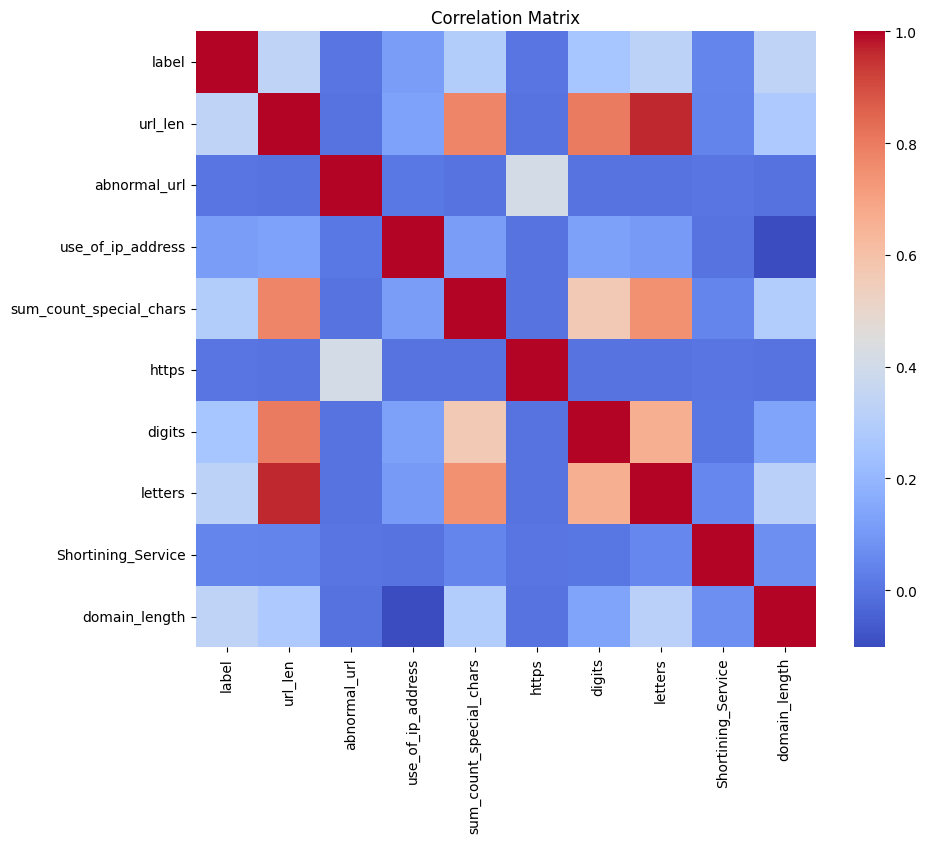

In [44]:
# Heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<Axes: >

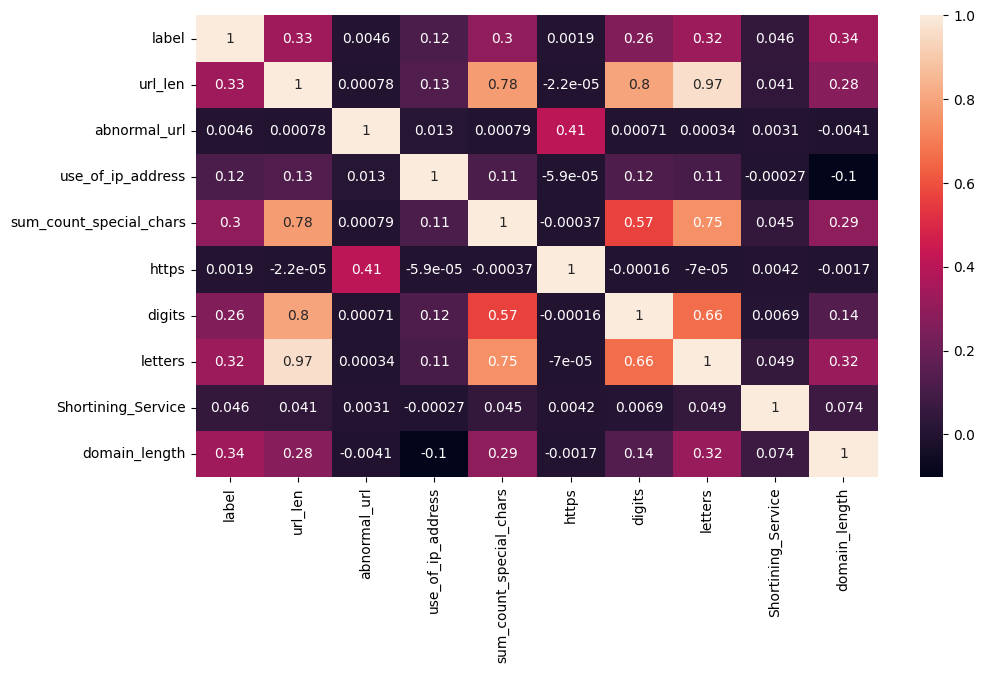

In [45]:
# Create a heatmap to visualize the correlation between different columns in the DataFrame 'data'
plt.figure(figsize=(11,6))
sns.heatmap(numeric_dataset.corr(),annot=True)

In [46]:
# Describe the specified columns in the DataFrame
dataset[['url_len', 'abnormal_url', 'sum_count_special_chars', 'letters', 'domain_length']].describe()


,url_len,abnormal_url,sum_count_special_chars,letters,domain_length
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.373052e+01,5.722051e-06,1.894476e+00,1.958014e+01,1.702762e+01
std,3.247609e+01,2.392075e-03,2.330070e+00,2.190438e+01,7.514642e+00
min,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00
25%,1.300000e+01,0.000000e+00,1.000000e+00,1.200000e+01,1.200000e+01
50%,1.800000e+01,0.000000e+00,1.000000e+00,1.600000e+01,1.600000e+01
75%,2.500000e+01,0.000000e+00,2.000000e+00,2.200000e+01,2.000000e+01
max,5.127000e+03,1.000000e+00,5.390000e+02,3.244000e+03,2.230000e+02


In [47]:
# Set display options
pd.set_option('display.float_format', lambda x: '%.0f' % x)

# Filter dataset based on label value 0 i.e. Benign
label_0_dataset = dataset[dataset['label'] == 0]
print("Summary statistics for Benign URLs")
print(label_0_dataset[['url_len', 'sum_count_special_chars', 'letters', 'domain_length']].describe())

# Filter dataset based on label value 1 i.e. Malicious
label_1_dataset = dataset[dataset['label'] == 1]
print("\nSummary statistics for Malicious URLs")
print(label_1_dataset[['url_len', 'sum_count_special_chars', 'letters', 'domain_length']].describe())

Summary statistics for Benign URLs
       url_len  sum_count_special_chars  letters  domain_length
count   823250                   823250   823250         823250
mean        18                        2       16             16
std         11                        1        8              5
min          2                        0        0              2
25%         12                        1       11             12
50%         16                        1       14             15
75%         21                        2       19             19
max        678                       67      497             87

Summary statistics for Malicious URLs
       url_len  sum_count_special_chars  letters  domain_length
count   225325                   225325   225325         225325
mean        44                        3       33             22
std         63                        4       42             11
min          2                        0        0              4
25%         22                

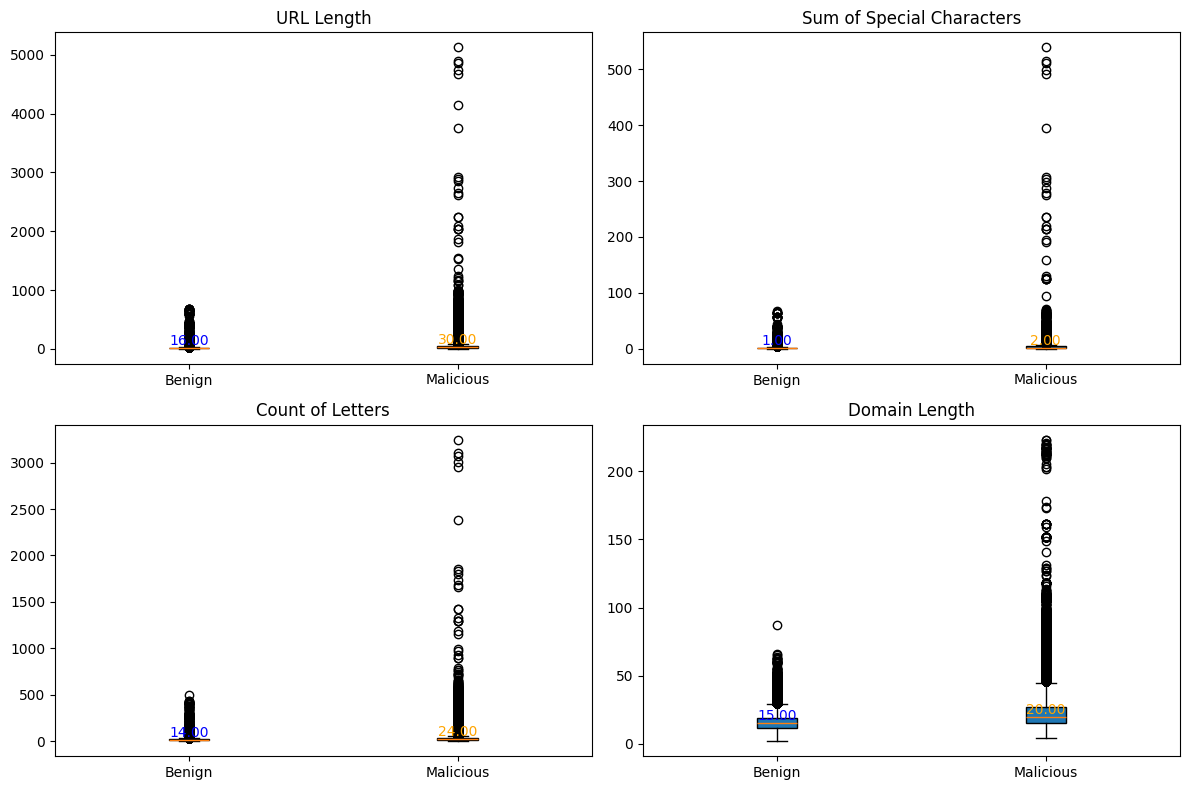

In [48]:
# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Box plot for 'url_len'
bp1 = axs[0, 0].boxplot([label_0_dataset['url_len'], label_1_dataset['url_len']], patch_artist=True)
axs[0, 0].set_title('URL Length')
axs[0, 0].set_xticklabels(['Benign', 'Malicious'])

# Box plot for 'sum_count_special_chars'
bp2 = axs[0, 1].boxplot([label_0_dataset['sum_count_special_chars'], label_1_dataset['sum_count_special_chars']], patch_artist=True)
axs[0, 1].set_title('Sum of Special Characters')
axs[0, 1].set_xticklabels(['Benign', 'Malicious'])

# Box plot for 'letters'
bp3 = axs[1, 0].boxplot([label_0_dataset['letters'], label_1_dataset['letters']], patch_artist=True)
axs[1, 0].set_title('Count of Letters')
axs[1, 0].set_xticklabels(['Benign', 'Malicious'])

# Box plot for 'domain_length'
bp4 = axs[1, 1].boxplot([label_0_dataset['domain_length'], label_1_dataset['domain_length']], patch_artist=True)
axs[1, 1].set_title('Domain Length')
axs[1, 1].set_xticklabels(['Benign', 'Malicious'])

# Add median values to the box plots for Benign URLs
medians_0 = [np.median(label_0_dataset['url_len']), np.median(label_0_dataset['sum_count_special_chars']),
             np.median(label_0_dataset['letters']), np.median(label_0_dataset['domain_length'])]

# Add median values to the box plots for Malicious URLs
medians_1 = [np.median(label_1_dataset['url_len']), np.median(label_1_dataset['sum_count_special_chars']),
             np.median(label_1_dataset['letters']), np.median(label_1_dataset['domain_length'])]

for ax, medians_0_value, medians_1_value in zip(axs.flatten(), medians_0, medians_1):
    ax.text(1, medians_0_value, f'{medians_0_value:.2f}', ha='center', va='bottom', color='blue')
    ax.text(2, medians_1_value, f'{medians_1_value:.2f}', ha='center', va='bottom', color='orange')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


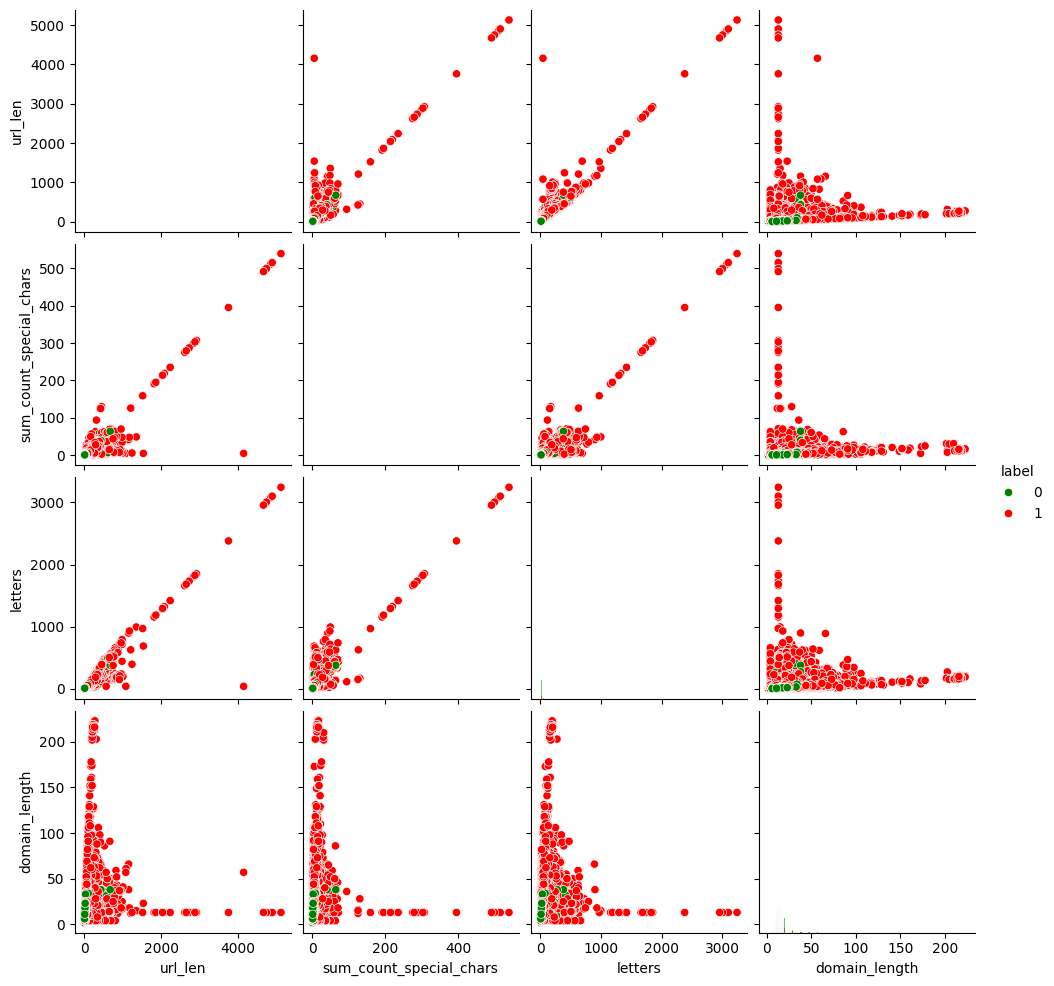

In [49]:
# Select the columns of interest
columns_of_interest = ['url_len', 'sum_count_special_chars', 'letters', 'domain_length', 'label']

# Create a pairplot with hue='label'
sns.pairplot(data=dataset[columns_of_interest], hue='label', diag_kind='hist', palette=['green', 'red'])

# Show the plot
plt.show()

In [33]:
dataset.shape
dataset

,url,label,url_len,domain,abnormal_url,use_of_ip_address,@,?,-,=,...,!,*,",",//,sum_count_special_chars,https,Shortining_Service,google_index,digits,letters
0,irs-profilepaymentservice.com/home,1,34,irs-profilepaymentservice.com,0,0,0,0,1,0,...,0,0,0,0,2,0,0,1,0,31
1,cpuggsukabumi.id,0,16,cpuggsukabumi.id,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,15
2,members.tripod.com/~don_rc/ring.htm,0,35,members.tripod.com,0,0,0,0,0,0,...,0,0,0,0,3,0,0,1,0,28
3,optuswebmailadminprovider.weebly.com/,1,37,optuswebmailadminprovider.weebly.com,0,0,0,0,0,0,...,0,0,0,0,2,0,0,1,0,34
4,topoz.com.pl,0,12,topoz.com.pl,0,0,0,0,0,0,...,0,0,0,0,2,0,0,1,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,marymarthamama.com,0,18,marymarthamama.com,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,17
1048571,shape.com,0,9,shape.com,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,8
1048572,vietnamconsulate-sf.org,0,23,vietnamconsulate-sf.org,0,0,0,0,1,0,...,0,0,0,0,2,0,0,1,0,21
1048573,tis.az,0,6,tis.az,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,5


In [34]:
X = dataset.drop(['url','label','domain', '@', '?', '-', '=', '.', '#', '%', '+', '$', '!', '*', ',', '//'],axis=1)
y = dataset['label']

In [35]:
X

,url_len,abnormal_url,use_of_ip_address,sum_count_special_chars,https,Shortining_Service,google_index,digits,letters
0,34,0,0,2,0,0,1,0,31
1,16,0,0,1,0,0,1,0,15
2,35,0,0,3,0,0,1,0,28
3,37,0,0,2,0,0,1,0,34
4,12,0,0,2,0,0,1,0,10
...,...,...,...,...,...,...,...,...,...
1048570,18,0,0,1,0,0,1,0,17
1048571,9,0,0,1,0,0,1,0,8
1048572,23,0,0,2,0,0,1,0,21
1048573,6,0,0,1,0,0,1,0,5


In [36]:
y

0          1
1          0
2          0
3          1
4          0
          ..
1048570    0
1048571    0
1048572    0
1048573    0
1048574    0
Name: label, Length: 1048575, dtype: int64

In [37]:
dataset.to_csv("./CSV/Final-edited.csv", index =False) ##Incase we want to export the extraploated features into a new CSV.

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,shuffle=True, random_state=5)

In [39]:
print(f"X_train Shape : {X_train.shape}")
print(f"Y_train Shape : {y_train.shape}")
print(f"X_test  Shape : {X_test.shape}")
print(f"Y_test  Shape : {y_test.shape}")

X_train Shape : (838860, 9)
Y_train Shape : (838860,)
X_test  Shape : (209715, 9)
Y_test  Shape : (209715,)


In [40]:
from imblearn.over_sampling import SMOTE,RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
ros = RandomOverSampler(sampling_strategy='minority')
X_over_resampled, y_over_resampled = ros.fit_resample(X_train, y_train)
rus = RandomUnderSampler(sampling_strategy='majority')
X_under_resampled, y_under_resampled = rus.fit_resample(X_train, y_train)

In [41]:
print(X_resampled.shape,y_resampled.shape)
print(X_over_resampled.shape,y_over_resampled.shape)
print(X_under_resampled.shape,y_under_resampled.shape)

(1317410, 9) (1317410,)
(1317410, 9) (1317410,)
(360310, 9) (360310,)


In [42]:
print(y_resampled.value_counts())
print(y_over_resampled.value_counts())
print(y_under_resampled.value_counts())

label
0    658705
1    658705
Name: count, dtype: int64
label
0    658705
1    658705
Name: count, dtype: int64
label
0    180155
1    180155
Name: count, dtype: int64


In [ ]:
X_resampled

In [43]:
from sklearn.linear_model import LogisticRegression

classifier1 = LogisticRegression(max_iter=1000, random_state=0)
classifier1.fit(X_resampled.values, y_resampled.values)
y_pred1 = classifier1.predict(X_test.values)

In [44]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_pred1)
print(cm1)

[[144767  19778]
 [ 13404  31766]]


In [62]:
'''import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curve
title = "Learning Curve (Random Forest Classifier)"
plot_learning_curve(classifier1, title, X, y, cv=5)
plt.show()
'''

#Saving this as reference for building multiple learning curves, please only delete if necessary

'import numpy as np\nimport matplotlib.pyplot as plt\nfrom sklearn.model_selection import learning_curve\n\ndef plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,\n                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):\n    \n    \n    plt.figure()\n    plt.title(title)\n    if ylim is not None:\n        plt.ylim(*ylim)\n    plt.xlabel("Training examples")\n    plt.ylabel("Score")\n    train_sizes, train_scores, test_scores = learning_curve(\n        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)\n    train_scores_mean = np.mean(train_scores, axis=1)\n    train_scores_std = np.std(train_scores, axis=1)\n    test_scores_mean = np.mean(test_scores, axis=1)\n    test_scores_std = np.std(test_scores, axis=1)\n    plt.grid()\n\n    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,\n                     train_scores_mean + train_scores_std, alpha=0.1,\n                     color="r")\n    plt.fill_between(train_sizes, test_s

Buidling Models and Comparing:

In [45]:
from sklearn.metrics import accuracy_score

accuracy1 = accuracy_score(y_test, y_pred1)
print("Accuracy1:", accuracy1)

Accuracy1: 0.8417757432706292


In [46]:
from sklearn.neighbors import KNeighborsClassifier

classifier2 = KNeighborsClassifier(metric='euclidean', n_jobs = -1)
classifier2.fit(X_resampled.values, y_resampled.values)
y_pred2 = classifier2.predict(X_test.values)


In [47]:
from sklearn.metrics import confusion_matrix

cm2 = confusion_matrix(y_test, y_pred2)
print(cm2)

[[154536  10009]
 [ 17531  27639]]


In [56]:
from sklearn.metrics import accuracy_score

accuracy2 = accuracy_score(y_test, y_pred2)
print("Accuracy2:", accuracy2)

Accuracy2: 0.8686789213933195


In [176]:
from sklearn.naive_bayes import GaussianNB

classifier3 = GaussianNB()
classifier3.fit(X_resampled.values, y_resampled.values)
y_pred3 = classifier3.predict(X_test.values)

In [177]:
cm3 = confusion_matrix(y_test, y_pred3)
print(cm3)

[[161769   2776]
 [ 33070  12100]]


In [178]:
accuracy3 = accuracy_score(y_test, y_pred3)
print("Accuracy3:", accuracy3)

Accuracy3: 0.829072789261617


In [60]:
from sklearn.tree import DecisionTreeClassifier 

classifier4 = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
classifier4.fit(X_resampled.values, y_resampled.values)
y_pred4 = classifier4.predict(X_test.values)

In [61]:
cm4 = confusion_matrix(y_test, y_pred4)
print(cm4)

[[142270  22275]
 [  9698  35472]]


In [62]:
from sklearn.metrics import accuracy_score

accuracy4 = accuracy_score(y_test, y_pred4)
print("Accuracy4:", accuracy4)

Accuracy4: 0.8475407100112057


In [65]:
from sklearn.ensemble import RandomForestClassifier

classifier5 = RandomForestClassifier(n_estimators=100, max_features='sqrt')
classifier5.fit(X_resampled.values, y_resampled.values)
y_pred5 = classifier5.predict(X_test.values)

In [66]:
cm5 = confusion_matrix(y_test, y_pred5)
print(cm5)

[[142022  22523]
 [  9293  35877]]


'import numpy as np\nimport matplotlib.pyplot as plt\nfrom sklearn.model_selection import learning_curve\n\ndef plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,\n                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):\n    \n    \n    plt.figure()\n    plt.title(title)\n    if ylim is not None:\n        plt.ylim(*ylim)\n    plt.xlabel("Training examples")\n    plt.ylabel("Score")\n    train_sizes, train_scores, test_scores = learning_curve(\n        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)\n    train_scores_mean = np.mean(train_scores, axis=1)\n    train_scores_std = np.std(train_scores, axis=1)\n    test_scores_mean = np.mean(test_scores, axis=1)\n    test_scores_std = np.std(test_scores, axis=1)\n    plt.grid()\n\n    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,\n                     train_scores_mean + train_scores_std, alpha=0.1,\n                     color="r")\n    plt.fill_between(train_sizes, test_s

In [67]:
accuracy5 = accuracy_score(y_test, y_pred5)
print("Accuracy5:", accuracy5)

Accuracy5: 0.8482893450635386


In [155]:
from sklearn.ensemble import RandomForestClassifier

classifier6 = RandomForestClassifier(n_estimators=100, max_features='sqrt', max_depth=5)
classifier6.fit(X_resampled.values, y_resampled.values)
y_pred6 = classifier6.predict(X_test.values)

In [156]:
accuracy6 = accuracy_score(y_test, y_pred6)
print("Accuracy6:", accuracy6)

Accuracy6: 0.8113582719404907


In [157]:
cm6 = confusion_matrix(y_test, y_pred6)
print(cm6)

[[134850  29695]
 [  9866  35304]]


In [159]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred5))

print('Accuracy Score: ',accuracy_score(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90    164545
           1       0.61      0.79      0.69     45170

    accuracy                           0.85    209715
   macro avg       0.78      0.83      0.80    209715
weighted avg       0.87      0.85      0.85    209715

Accuracy Score:  0.8482893450635386


In [158]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred6))

print('Accuracy Score: ',accuracy_score(y_test,y_pred6))

              precision    recall  f1-score   support

           0       0.93      0.82      0.87    164545
           1       0.54      0.78      0.64     45170

    accuracy                           0.81    209715
   macro avg       0.74      0.80      0.76    209715
weighted avg       0.85      0.81      0.82    209715

Accuracy Score:  0.8113582719404907


In [179]:
#Comparing accuracy
data = {
    'Model': ['LogisticRegression', 'KNeighborsClassifier', 'GaussianNB', 'DecisionTreeClassifier', 'RandomForestClassifier', 'RandomForestClassifier with Max Depth = 5'],
    'Accuracy': [accuracy1, accuracy2, accuracy3, accuracy4, accuracy5, accuracy6]
}

accuracy_table = pd.DataFrame(data)
print(accuracy_table)

                                       Model  Accuracy
0                         LogisticRegression  0.841776
1                       KNeighborsClassifier  0.868679
2                                 GaussianNB  0.829073
3                     DecisionTreeClassifier  0.847541
4                     RandomForestClassifier  0.848318
5  RandomForestClassifier with Max Depth = 5  0.811358


The main choice in terms of selecting the models comes down to choosing between LogisticRegression and DecisionTree because of their higher accuracy/recall score with comparitively lower model building time compared to KNN.

In [81]:
from joblib import dump

# # classifier dumps
dump(classifier1, './Models/classifier1_model.joblib')
dump(classifier2, './Models/classifier2_model.joblib', compress=3)
dump(classifier3, './Models/classifier3_model.joblib')
dump(classifier4, './Models/classifier4_model.joblib')
dump(classifier5, './Models/classifier5_model.joblib', compress = 3)

['./Models/classifier5_model.joblib']

Plotting Learning curve for all the models:

In [202]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt



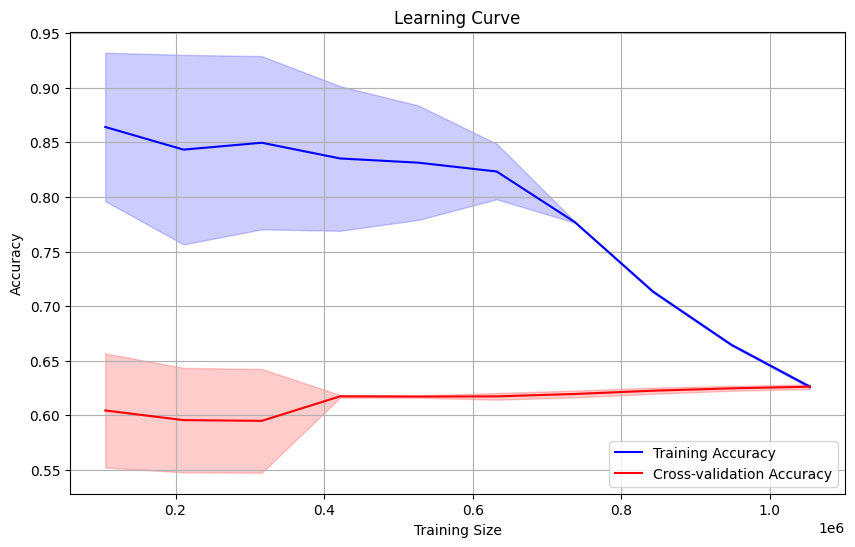

In [188]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=classifier3,
    X=X_resampled,
    y=y_resampled,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='accuracy',
    error_score = 'raise'
)

# Calculate mean and standard deviation for training and testing scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.plot(train_sizes, test_mean, label='Cross-validation Accuracy', color='red')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='red', alpha=0.2)
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid()
plt.show()

c:\Users\Sijal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
2 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Sijal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Sijal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\Sijal\AppData\Local\Programs\Python\Python310\lib\site-packages\

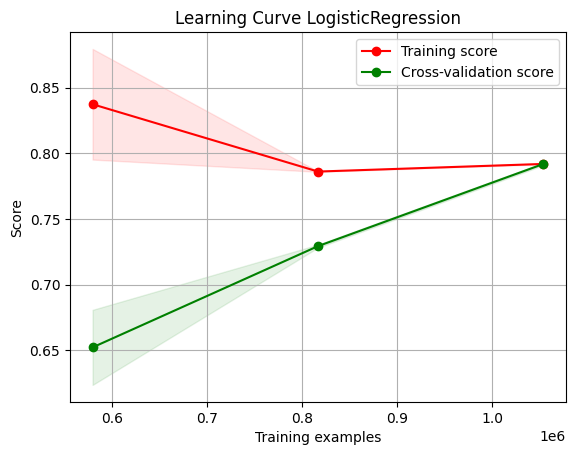

In [203]:
# Plot learning curve
title = "Learning Curve LogisticRegression"
classifier1 = LogisticRegression(solver='liblinear')
plot_learning_curve(classifier1, title, X_resampled, y_resampled, cv=5)
plt.show()

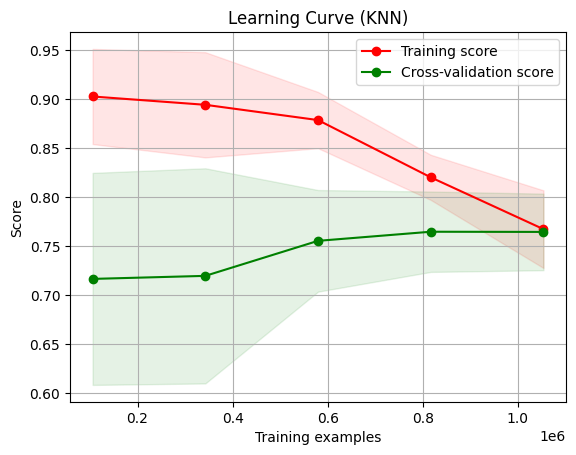

In [54]:
# Plot learning curve
title = "Learning Curve (KNN)"
plot_learning_curve(classifier2, title, X_resampled, y_resampled, cv=5)
plt.show()

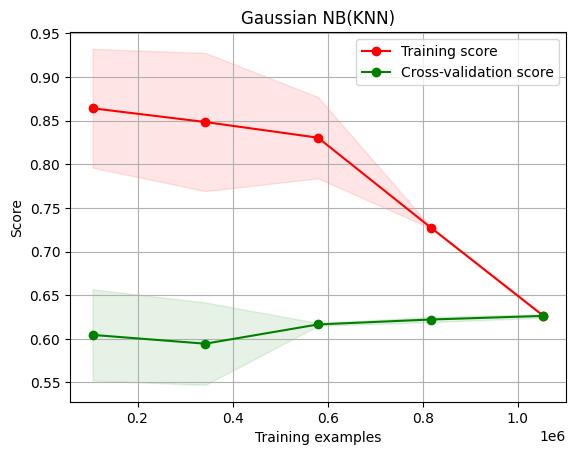

In [59]:
title = "Gaussian NB(KNN)"
plot_learning_curve(classifier3, title, X_resampled, y_resampled, cv=5)
plt.show()

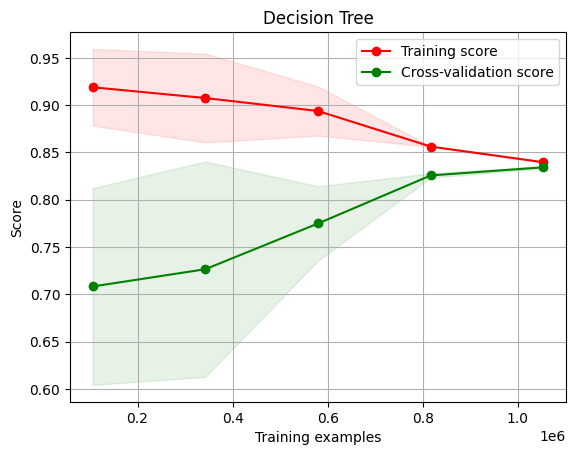

In [63]:
title = "Decision Tree"
plot_learning_curve(classifier4, title, X_resampled, y_resampled, cv=5)
plt.show()

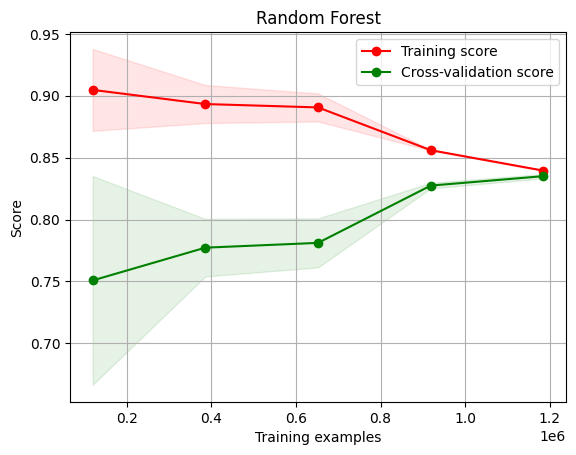

In [69]:
title = "Random Forest"
plot_learning_curve(classifier5, title, X_resampled, y_resampled, cv=10)
plt.show()

In [80]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
logreg_pipeline = Pipeline(steps = [('scale',StandardScaler()),('LR',LogisticRegression(random_state=42))])

In [82]:
logreg_cv = cross_val_score(logreg_pipeline,X_resampled,y_resampled,cv=10,scoring='f1')

In [84]:
print('Logistic Regression mean :',cross_val_score(logreg_pipeline,X_resampled,y_resampled,cv=10,scoring='f1').mean())

Logistic Regression mean : 0.7720115560101005


Comparing Accuracy Score report between Logistic Regression and Random Forest

In [86]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))

print('Accuracy Score: ',accuracy_score(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90    164545
           1       0.62      0.70      0.66     45170

    accuracy                           0.84    209715
   macro avg       0.77      0.79      0.78    209715
weighted avg       0.85      0.84      0.85    209715

Accuracy Score:  0.8417757432706292


In [90]:
print(classification_report(y_test,y_pred5))

print('Accuracy Score: ',accuracy_score(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90    164545
           1       0.61      0.79      0.69     45170

    accuracy                           0.85    209715
   macro avg       0.78      0.83      0.80    209715
weighted avg       0.87      0.85      0.85    209715

Accuracy Score:  0.8482893450635386


Checking Accuracy/Classification report for KNN for additional verification

In [92]:
print(classification_report(y_test,y_pred2))

print('Accuracy Score: ',accuracy_score(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92    164545
           1       0.73      0.61      0.67     45170

    accuracy                           0.87    209715
   macro avg       0.82      0.78      0.79    209715
weighted avg       0.86      0.87      0.86    209715

Accuracy Score:  0.8686789213933195


Performing L1 and L2 Regularization as well as applying a standard scaler to the data to see if we can improve accuracy and build time for Logistic Regression.

In [182]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_resampled)
X_test_std = sc.transform(X_test)
X_combined_standard = np.vstack((X_train_std,X_test_std))
Y_combined = np.hstack((y_resampled, y_test))

In [97]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X,y,classifier,test_idx=None,resolution=0.02):
    
    # Initialise the marker types and colors
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    color_Map = ListedColormap(colors[:len(np.unique(y))]) #we take the color mapping correspoding to the 
                                                            #amount of classes in the target data
    
    # Parameters for the graph and decision surface
    x1_min = X[:,0].min() - 1
    x1_max = X[:,0].max() + 1
    x2_min = X[:,1].min() - 1
    x2_max = X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                           np.arange(x2_min,x2_max,resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contour(xx1,xx2,Z,alpha=0.4,cmap = color_Map)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    # Plot samples
    X_test, Y_test = X[test_idx,:], y[test_idx]
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1],
                    alpha = 0.8, c = color_Map(idx),
                    marker = markers[idx], label = cl
                   )

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import validation_curve

C_param_range = [0.001,0.01,0.1,1,10,100]

acc_table = pd.DataFrame(columns = ['C_parameter','Accuracy'])
acc_table['C_parameter'] = C_param_range

j = 0
for i in C_param_range:
    
    # Apply logistic regression model to training data
    lr = LogisticRegression(penalty = 'l2', C = i,random_state = 0)
    lr.fit(X_train_std,y_resampled)
    
    # Predict using model
    y_tuned_pred = lr.predict(X_test_std)
    
    # Saving accuracy score in table
    acc_table.iloc[j,1] = accuracy_score(y_test,y_tuned_pred)
    j += 1



<Figure size 1000x1000 with 0 Axes>

In [101]:
print (acc_table)

   C_parameter  Accuracy
0        0.001   0.82738
1        0.010  0.835014
2        0.100  0.840612
3        1.000  0.841857
4       10.000  0.841766
5      100.000  0.841776


In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import validation_curve

C_param_range = [0.001,0.01,0.1,1,10,100]

acc_table1 = pd.DataFrame(columns = ['C_parameter','Accuracy'])
acc_table1['C_parameter'] = C_param_range


j = 0
for i in C_param_range:
    
    # Apply logistic regression model to training data
    lr1 = LogisticRegression(penalty = 'l2', C = i,random_state = 0)
    lr1.fit(X_resampled,y_resampled)
    
    # Predict using model
    y_tuned_pred1 = lr1.predict(X_test)
    
    # Saving accuracy score in table
    acc_table1.iloc[j,1] = accuracy_score(y_test,y_tuned_pred1)
    j += 1

<Figure size 1000x1000 with 0 Axes>

In [103]:
print (acc_table1)

   C_parameter  Accuracy
0        0.001  0.842129
1        0.010  0.841819
2        0.100  0.841776
3        1.000  0.841776
4       10.000  0.841776
5      100.000  0.841781


Checking L1 and L2 classification report and accuracy

In [99]:
print(classification_report(y_test,y_tuned_pred))

print('Accuracy Score: ',accuracy_score(y_test,y_tuned_pred))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90    164545
           1       0.62      0.70      0.66     45170

    accuracy                           0.84    209715
   macro avg       0.77      0.79      0.78    209715
weighted avg       0.85      0.84      0.85    209715

Accuracy Score:  0.8417757432706292


In [100]:
print(classification_report(y_test,y_pred1))

print('Accuracy Score: ',accuracy_score(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90    164545
           1       0.62      0.70      0.66     45170

    accuracy                           0.84    209715
   macro avg       0.77      0.79      0.78    209715
weighted avg       0.85      0.84      0.85    209715

Accuracy Score:  0.8417757432706292


In [104]:
print(classification_report(y_test,y_tuned_pred1))

print('Accuracy Score: ',accuracy_score(y_test,y_tuned_pred1))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90    164545
           1       0.62      0.70      0.66     45170

    accuracy                           0.84    209715
   macro avg       0.77      0.79      0.78    209715
weighted avg       0.85      0.84      0.85    209715

Accuracy Score:  0.8417805116467587


Feature Importance for Random Forest and Logistic Regression:

In [166]:
colormap = plt.cm.get_cmap('RdYlBu')
def rf_feat_importance(m, df):
    return pd.DataFrame({'Feature':df.columns, 'Importance':m.feature_importances_}).sort_values('Importance', ascending=False)


fi = rf_feat_importance(classifier5, X)
fi[:10].style.background_gradient(cmap=colormap)

C:\Users\Sijal\AppData\Local\Temp\ipykernel_12660\4240609798.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('RdYlBu')


,Feature,Importance
0,url_len,0.422866
8,letters,0.283267
7,digits,0.168813
3,sum_count_special_chars,0.115444
5,Shortining_Service,0.006848
2,use_of_ip_address,0.002758
1,abnormal_url,0.000003
4,https,0.000000
6,google_index,0.000000


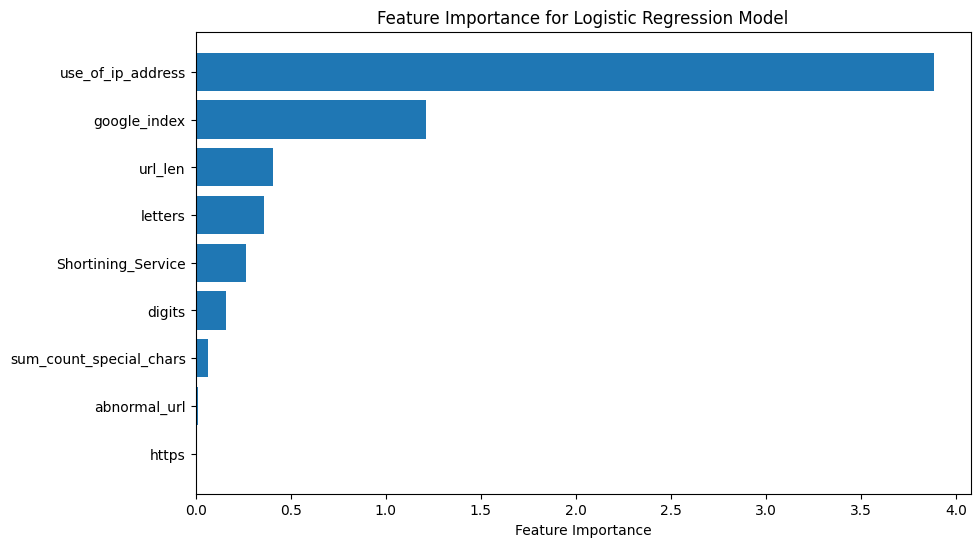

In [167]:
coefficients = classifier1.coef_[0]
feature_names =  X_resampled.columns.tolist()
# Calculate feature importance (absolute values of coefficients)
feature_importance = np.abs(coefficients)

# Sort feature importance in descending order
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_feature_names = [feature_names[i] for i in sorted_indices]
sorted_feature_importance = [feature_importance[i] for i in sorted_indices]


plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_importance)), sorted_feature_importance, align='center')
plt.yticks(range(len(sorted_feature_importance)), sorted_feature_names)
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Logistic Regression Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()

In [204]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
classifier1_df = pd.DataFrame(data=[f1_score(y_test,y_pred1),accuracy_score(y_test, y_pred1), recall_score(y_test, y_pred1),
                   precision_score(y_test, y_pred1), roc_auc_score(y_test, y_pred1)], 
             columns=['Logistic Regression'],
             index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])

In [205]:
classifier5_df = pd.DataFrame(data=[f1_score(y_test,y_pred5),accuracy_score(y_test, y_pred5), recall_score(y_test, y_pred5),
                   precision_score(y_test, y_pred5), roc_auc_score(y_test, y_pred5)], 
             columns=['Random Forest'],
             index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])

In [206]:
classifier6_df = pd.DataFrame(data=[f1_score(y_test,y_tuned_pred1),accuracy_score(y_test, y_tuned_pred1), recall_score(y_test, y_tuned_pred1),
                   precision_score(y_test, y_tuned_pred1), roc_auc_score(y_test, y_tuned_pred1)], 
             columns=['Logistic Regression L1'],
             index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])

In [207]:
classifier7_df = pd.DataFrame(data=[f1_score(y_test,y_tuned_pred1),accuracy_score(y_test, y_tuned_pred1), recall_score(y_test, y_tuned_pred1),
                   precision_score(y_test, y_tuned_pred1), roc_auc_score(y_test, y_tuned_pred1)], 
             columns=['Logistic Regression L2'],
             index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])

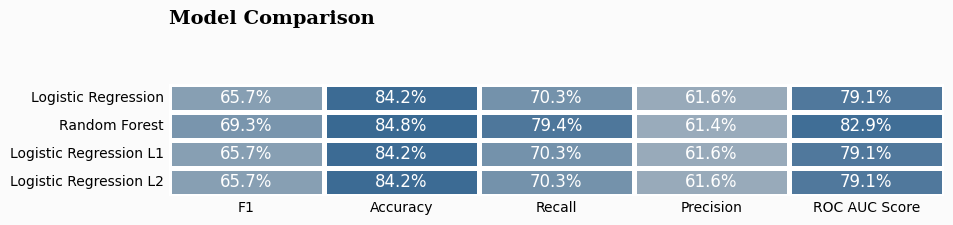

In [208]:
df_models = round(pd.concat([classifier1_df,classifier5_df,classifier6_df, classifier7_df], axis=1),4)
import matplotlib
colors = ["lightgray","lightgray","#0f4c81"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

background_color = "#fbfbfb"

fig = plt.figure(figsize=(10,8)) # create figure
gs = fig.add_gridspec(4, 2)
gs.update(wspace=0.1, hspace=0.5)
ax0 = fig.add_subplot(gs[0, :])

sns.heatmap(df_models.T, cmap=colormap,annot=True,fmt=".1%",vmin=0,vmax=0.95, linewidths=2.5,cbar=False,ax=ax0,annot_kws={"fontsize":12})
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) 

ax0.text(0,-2.15,'Model Comparison',fontsize=14,fontweight='bold',fontfamily='serif')
ax0.tick_params(axis=u'both', which=u'both',length=0)

plt.show()